In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('drive/My Drive/Colab Notebooks/Task/Task 7')

FileNotFoundError: ignored

In [4]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

**Importing the dataset**

In [5]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

FileNotFoundError: ignored

In [7]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])

**Splitting the dataset into the Training set and Test set**

In [9]:
X=data.iloc[:,1:4]
y=data['Purchased']
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

**Fitting Random Forest to the Training set**

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50)

**Predicting the Test set results**

In [15]:
y_pred=rf_clf.predict(X_test)


In [14]:
rf_clf.score(X_test, y_test)

0.925

**Making the Confusion Matrix**

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
result=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[54  4]
 [ 2 20]]


In [20]:
acuracy=accuracy_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
roc_auc

0.9200626959247649

**Visualising the Training set results**

In [21]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

In [23]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [28]:
X=data.iloc[:,1:4]
y=data['Purchased']
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to 

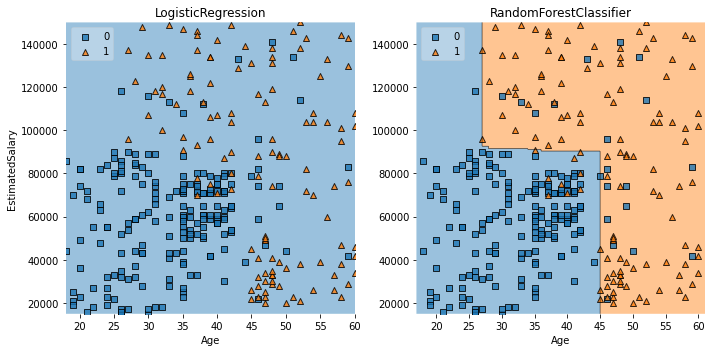

In [32]:
from sklearn.linear_model import LogisticRegression
dt = RandomForestClassifier(max_depth=2)
X_train = X_train.loc[:,['Age', 'EstimatedSalary']]
#X_test = X_test.loc[:,['Age', 'EstimatedSalary']]
dt.fit(X_train, y_train)

# Instantiate logreg
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_train, y_train, clfs)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to 

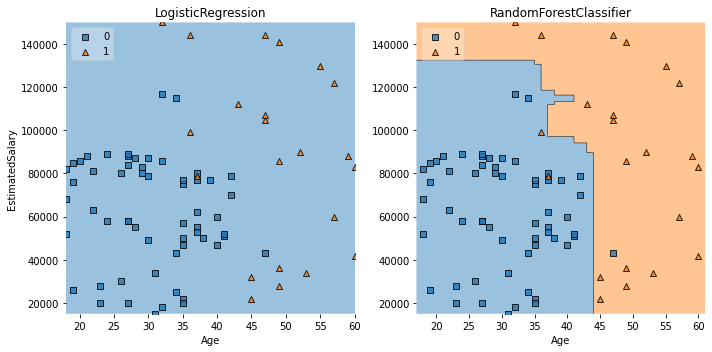

In [33]:
from sklearn.linear_model import LogisticRegression
dt = RandomForestClassifier(max_depth=2)
#X_train = X_train.loc[:,['Age', 'EstimatedSalary']]
X_test = X_test.loc[:,['Age', 'EstimatedSalary']]
dt.fit(X_test, y_test)

# Instantiate logreg
logreg = LogisticRegression(random_state=1)
logreg.fit(X_test, y_test)

clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)